# Comida Callejera Global

Elegí hacerlo con un dataset diferente es sobre comida callejera global. Como es un dataset diferente, añadiré preprosesamiento y aparte haré dos cosas, primero un método de clasificación binaria y después haré una regresión lineal.

## Problema de clasificación: ¿El platillo es vegetariano?

In [ ]:
import pandas as pd

# 1. Cargar el dataset
df = pd.read_csv("global_street_food.csv")  

# Revisar valores únicos primero
print("Valores únicos en Vegetarian:", df['Vegetarian'].unique())

Valores únicos en Vegetarian: ['No' 'Yes']


In [ ]:
# 2. Codificar la variable objetivo (Vegetarian)
# Codificar Yes -> 1, No -> 0
df['Vegetarian'] = df['Vegetarian'].map({'Yes': 1, 'No': 0})


# 3. Codificación de variables categóricas

# One-Hot Encoding para columnas categóricas... lo volvemos columnas binarias para trabajar con ellas fácilmente
categorical_columns = ['Country', 'Region/City', 'Cooking Method']
df_encoded = pd.get_dummies(df, columns=categorical_columns)


# 4. Variables con Ingredients

# Paso 4.1: Normalizar a minúsculas... así todos tendrán el mismo formato
df_encoded['Ingredients'] = df_encoded['Ingredients'].str.lower()

# Paso 4.2: Lista de ingredientes clave
# No revisé todos los ingredientes ni todo el dataset, pero tomé algunos y verifiqué que estuvieran presentes 
# esto porque consideré que muchos de los platillos tenían varios de estos ingredientes en común, 
# también porque son comunes en la comida callejera global yyyy elegí algunos vegetarianos y otros no para 
# que me ayudaran a llevar a cabo el análisis que buscaba que era ver si el platillo era vegetariano o no.

ingredientes_clave = [
    'chicken', 'beef', 'pork', 'fish', 'egg', 'cheese', 'milk',
    'tofu', 'vegetables', 'lentils', 'potato', 'rice', 'noodles'
]

# Paso 4.3: Crear columnas binarias... crearemos una columna para cada ingrediente clave 
# y así comvertimos tmb texto en variables numéricas
for ingrediente in ingredientes_clave:
    df_encoded[f'has_{ingrediente}'] = df_encoded['Ingredients'].str.contains(ingrediente).astype(int)

# 5. Quitamos columnas innecesarias
df_encoded = df_encoded.drop(columns=['Dish Name', 'Description', 'Ingredients'])

# 6. Verificación final
print("Dimensiones finales del dataset:", df_encoded.shape)
print("Columnas finales:\n", df_encoded.columns.tolist())


Dimensiones finales del dataset: (4500, 60)
Columnas finales:
 ['Typical Price (USD)', 'Vegetarian', 'Country_Egypt', 'Country_India', 'Country_Israel', 'Country_Japan', 'Country_Lebanon', 'Country_Mexico', 'Country_Nigeria', 'Country_South Africa', 'Country_Thailand', 'Country_Turkey', 'Country_USA', 'Region/City_Ankara', 'Region/City_Ayutthaya', 'Region/City_Bangkok', 'Region/City_Beirut', 'Region/City_Cairo', 'Region/City_Chiang Mai', 'Region/City_Delhi', 'Region/City_Durban', 'Region/City_Guadalajara', 'Region/City_Hiroshima', 'Region/City_Istanbul', 'Region/City_Izmir', 'Region/City_Kolkata', 'Region/City_Kyoto', 'Region/City_Lagos', 'Region/City_Mexico City', 'Region/City_Mumbai', 'Region/City_New York', 'Region/City_Osaka', 'Region/City_Philadelphia', 'Region/City_Puebla', 'Region/City_Tel Aviv', 'Region/City_Texas', 'Region/City_Tokyo', 'Region/City_Tripoli', 'Cooking Method_Assembled', 'Cooking Method_Baked', 'Cooking Method_Boiled', 'Cooking Method_Boiled/Grilled', 'Cooking M

Entonces tenemos que:
Un DataFrame con:
* Variable objetivo: Vegetarian (0/1)
* Variables numéricas (precio)
* Variables categóricas codificadas (Country, Region/City, Cooking Method)
* Variables binarias por ingrediente (has_chicken, has_egg, etc.)

Ahora vamos a hacer el entrenammiento para los modelos supervisados:

In [3]:
pip install scikit-learn pandas

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# 1. Separar variables de entrada y salida

X = df_encoded.drop(columns=['Vegetarian'])  # Variables de entrada... quitamos vegetarian porque esa es la que queremos predecir
y = df_encoded['Vegetarian']                # Variable objetivo

# 2. División de datos (80% train / 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Entrenamiento de modelos:

In [6]:
# Árbol de Decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [7]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# Regresión Logística
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Evaluación de modelos

In [12]:
def evaluar_modelo(nombre, modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    print(f"Resultados para {nombre}:")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
    print("Precision:", round(precision_score(y_test, y_pred), 3))
    print("Recall:", round(recall_score(y_test, y_pred), 3))
    print("F1 Score:", round(f1_score(y_test, y_pred), 3))

# Evaluamos todos
evaluar_modelo("Regresión Logística", log_model, X_test, y_test)
evaluar_modelo("Árbol de Decisión", tree_model, X_test, y_test)
evaluar_modelo("Random Forest", rf_model, X_test, y_test)

Resultados para Regresión Logística:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Resultados para Árbol de Decisión:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Resultados para Random Forest:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Comparación visual

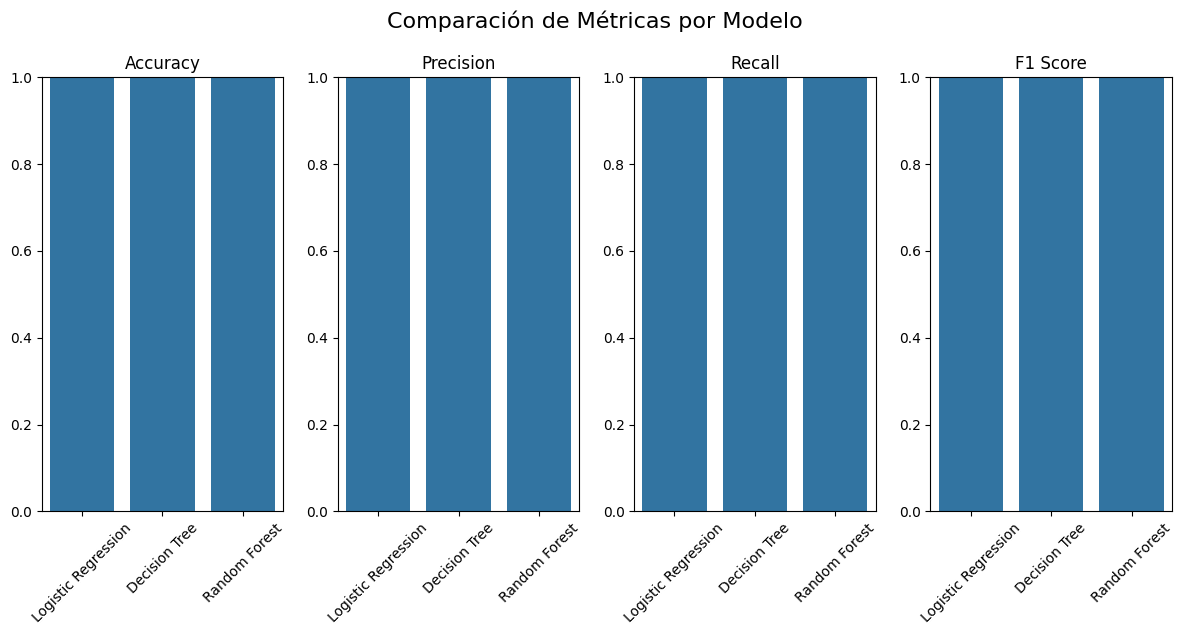

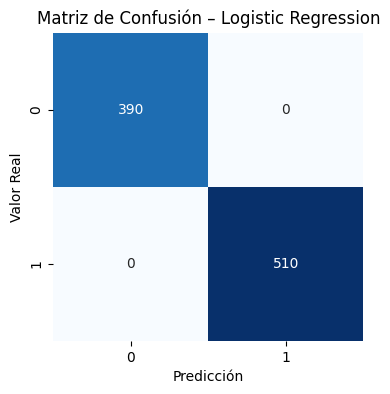

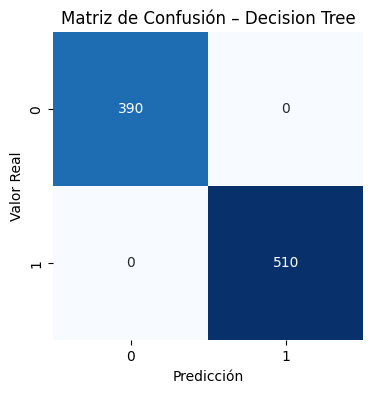

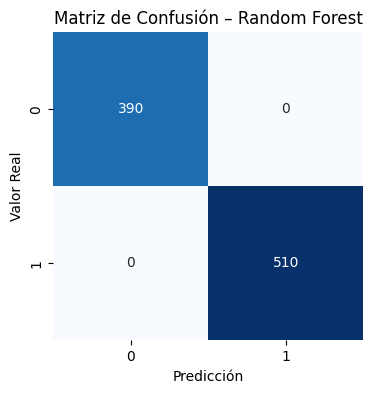

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Guardar resultados de evaluación
modelos = {
    "Logistic Regression": log_model,
    "Decision Tree": tree_model,
    "Random Forest": rf_model
}

metricas = {
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

# Evaluar cada modelo y guardar métricas
for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test)
    metricas["Accuracy"].append(accuracy_score(y_test, y_pred))
    metricas["Precision"].append(precision_score(y_test, y_pred))
    metricas["Recall"].append(recall_score(y_test, y_pred))
    metricas["F1 Score"].append(f1_score(y_test, y_pred))

# Crear gráfico de barras comparativo
plt.figure(figsize=(12, 6))
for i, (metrica, valores) in enumerate(metricas.items()):
    plt.subplot(1, 4, i+1)
    sns.barplot(x=list(modelos.keys()), y=valores)
    plt.title(metrica)
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.suptitle("Comparación de Métricas por Modelo", fontsize=16, y=1.05)
plt.show()

# Matrices de confusión
for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Matriz de Confusión – {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Valor Real")
    plt.show()


### Siento que hay un sobreajuste entonces checaré...

In [41]:
print(y.value_counts(normalize=True))  # Proporciones

Typical Price (USD)
2.50    0.025556
4.00    0.016444
3.50    0.015556
4.50    0.015111
2.80    0.014444
          ...   
1.99    0.000444
3.02    0.000444
4.29    0.000444
4.72    0.000444
4.65    0.000444
Name: proportion, Length: 481, dtype: float64


In [ ]:
print("Tamaño del dataset:", df_encoded.shape[0])
print("Número de variables:", df_encoded.shape[1])

Tamaño del dataset: 4500
Número de variables: 60


In [ ]:
print(df['Vegetarian'].value_counts()) # Para ver si me que con puros unos o ceros

Vegetarian
1    2551
0    1949
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import cross_val_score

for nombre, modelo in modelos.items():
    scores = cross_val_score(modelo, X, y, cv=5, scoring='f1')
    print(f"{nombre}: F1 promedio = {np.mean(scores):.3f} ± {np.std(scores):.3f}")

Logistic Regression: F1 promedio = 0.964 ± 0.073
Decision Tree: F1 promedio = 0.964 ± 0.073
Random Forest: F1 promedio = 0.976 ± 0.048


Al final todo parece bien... osea que la clasificación fue buena con los tres métodos y de hecho, no tenemos que usar una red neuronal para este problema. 

### Primera conclusión
Nuestro análisis indica que de toda la comida callejera global que está en nuestro dataset, 510 son vegetarianas y 390 no lo son.

# Segundo problema. ¿Ser vegetariano influye monetariamente?
Ahora haremos uso de la regresión lineal...

In [29]:
print(df_encoded.columns.tolist())


['Typical Price (USD)', 'Vegetarian', 'Country_Egypt', 'Country_India', 'Country_Israel', 'Country_Japan', 'Country_Lebanon', 'Country_Mexico', 'Country_Nigeria', 'Country_South Africa', 'Country_Thailand', 'Country_Turkey', 'Country_USA', 'Region/City_Ankara', 'Region/City_Ayutthaya', 'Region/City_Bangkok', 'Region/City_Beirut', 'Region/City_Cairo', 'Region/City_Chiang Mai', 'Region/City_Delhi', 'Region/City_Durban', 'Region/City_Guadalajara', 'Region/City_Hiroshima', 'Region/City_Istanbul', 'Region/City_Izmir', 'Region/City_Kolkata', 'Region/City_Kyoto', 'Region/City_Lagos', 'Region/City_Mexico City', 'Region/City_Mumbai', 'Region/City_New York', 'Region/City_Osaka', 'Region/City_Philadelphia', 'Region/City_Puebla', 'Region/City_Tel Aviv', 'Region/City_Texas', 'Region/City_Tokyo', 'Region/City_Tripoli', 'Cooking Method_Assembled', 'Cooking Method_Baked', 'Cooking Method_Boiled', 'Cooking Method_Boiled/Grilled', 'Cooking Method_Fried', 'Cooking Method_Grilled', 'Cooking Method_Pan-Fri

In [30]:
# Asegurar de que la columna 'Cost' esté en formato numérico
df_encoded['Cost'] = pd.to_numeric(df_encoded['Typical Price (USD)'], errors='coerce')

# Eliminar filas con costo faltante 
df_reg = df_encoded.dropna(subset=['Cost'])


In [ ]:
# Variables predictoras 
X_reg = df_reg.drop(columns=['Cost'])
y_reg = df_reg['Cost']


In [32]:
from sklearn.model_selection import train_test_split

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

In [33]:
# Modelo de Regresión Lineal

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Inicializar modelo
linreg_model = LinearRegression()

# Entrenar
linreg_model.fit(Xr_train, yr_train)

# Predecir
yr_pred = linreg_model.predict(Xr_test)


In [34]:
# Evaluación del modelo
print("Evaluación del modelo de regresión lineal:")
print("R² Score:", round(r2_score(yr_test, yr_pred), 3))
print("MSE:", round(mean_squared_error(yr_test, yr_pred), 3))


Evaluación del modelo de regresión lineal:
R² Score: 1.0
MSE: 0.0


In [35]:
# Ver qué influye más en el costo
import pandas as pd

coef_cost = pd.DataFrame({
    'Variable': X_reg.columns,
    'Coeficiente': linreg_model.coef_
}).sort_values(by='Coeficiente', ascending=False)

print("Variables que más aumentan o disminuyen el costo del platillo:\n")
print(coef_cost.head(10))


Variables que más aumentan o disminuyen el costo del platillo:

                Variable   Coeficiente
0    Typical Price (USD)  1.000000e+00
37   Region/City_Tripoli  1.447903e-15
30  Region/City_New York  2.226404e-16
42  Cooking Method_Fried  2.080462e-16
13    Region/City_Ankara  1.788748e-16
47           has_chicken  1.703621e-16
25   Region/City_Kolkata  1.693795e-16
39  Cooking Method_Baked  1.688666e-16
6        Country_Lebanon  1.670594e-16
52            has_cheese  1.469183e-16


En este caso, el análisis nos dice que las variables que más influyen en el costo del platillo son la región, el método de cocción horneado y frito e ingredientes como el pollo y el queso. (xd jeje)

In [36]:
# ¿hay una relación entre ser vegetariano y el costo del platillo?
vegetarian_coef = coef_cost[coef_cost['Variable'] == 'Vegetarian']
print("\n Influencia de ser vegetariano en el costo:")
print(vegetarian_coef)



 Influencia de ser vegetariano en el costo:
     Variable   Coeficiente
1  Vegetarian -1.029357e-16


Al parecer no... :(

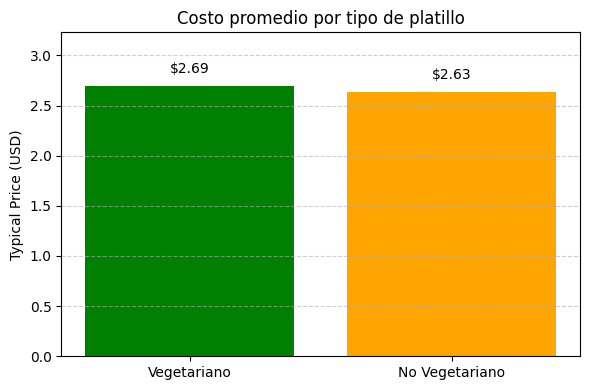

In [37]:
import matplotlib.pyplot as plt

df_encoded['Typical Price (USD)'] = pd.to_numeric(df_encoded['Typical Price (USD)'], errors='coerce')

# Elimina filas con costo faltante
df_plot = df_encoded.dropna(subset=['Typical Price (USD)'])

# Calcular costo promedio para cada tipo (vegetariano o no)
mean_cost = df_plot.groupby('Vegetarian')['Typical Price (USD)'].mean()

# Crear gráfico de barras
labels = ['Vegetariano', 'No Vegetariano']
colors = ['green', 'orange']

plt.figure(figsize=(6, 4))
plt.bar(labels, mean_cost, color=colors)

# Opcional: mostrar los valores encima de cada barra
for i, value in enumerate(mean_cost):
    plt.text(i, value + 0.1, f"${value:.2f}", ha='center', va='bottom')

plt.title('Costo promedio por tipo de platillo')
plt.ylabel('Typical Price (USD)')
plt.ylim(0, max(mean_cost) * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Segunda conclusión
Comprobado con la gráfica... ya vimos también que hay otros factores que influyen más como el costo, la región, algunos ingredientes y el método de cocción. Aún así puede que nuestro análisis no haya sido tan completo porque eliminamos unas variables e ingredientes para facilitar el proceso de clasificación y aunque en la gráfica no se vea una diferencia muy marcada en cuestión de los precios, la comida vegetariana está un poco más arriba que la no vegetariana. ¿¿Podría ser que con un análisis más robusto podramos ver una diferencia más marcada??

# Conclusión general

Elegí un dataset diferente (en realidad había elegido otros pero ate un análisis más profundo me topé con varias irregularidades de los datasets y al final, en la tercera ocasión me encntré con este...), lo limpié un poco más para facilitar mi anállisis pero al final al facilitarlo y hacerlo más simple, pude usar métodos de aprendizaje supervisados con mayor facilidad sin necesidad de recurrir a la creación de modelos de redes neuronales, sin embargo podría ser que ante un análisis más extenso y con más variables podamos, o más bien tengamos, que hacer uso de ella. Aunque, rescatando lo que hice en el presente trabajo, pude jugar un poco con el dataset que fui moldeando a partir del original y pude analizar ciertas cuestiones, espero este proyecto sea de su agrado y por si quiere revisar el data set, le anexo el link de kaggle: https://www.kaggle.com/datasets/benjnb/global-street-food-dataset